**NAME** - _Padmanavan Kumar_

Loan Approval Prediction
(Data Preprocessing and feature engineering)

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the datasets
train_df = pd.read_csv('Training Dataset.csv')
test_df = pd.read_csv('Test Dataset.csv')

# Filling missing values for categorical features with the mode
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train_df[column] = train_df[column].fillna(train_df[column].mode()[0])
    test_df[column] = test_df[column].fillna(test_df[column].mode()[0])

# Filling missing values for numerical features with the median
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())
train_df['Loan_Amount_Term'] = train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median())
test_df['Loan_Amount_Term'] = test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].median())

# Encode categorical variables using Label Encoding
label_encoders = {}
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']:
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    label_encoders[column] = le

# Convert 'Dependents' to numerical values
train_df['Dependents'] = train_df['Dependents'].replace({'3+': 3})
test_df['Dependents'] = test_df['Dependents'].replace({'3+': 3})
train_df['Dependents'] = train_df['Dependents'].astype(int)
test_df['Dependents'] = test_df['Dependents'].astype(int)

# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

train_df.head(), test_df.head()


(    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
 0  LP001002       1        0           0          0              0   
 1  LP001003       1        1           1          0              0   
 2  LP001005       1        1           0          0              1   
 3  LP001006       1        1           0          1              0   
 4  LP001008       1        0           0          0              0   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0         0.072991          -0.554487   -0.211241          0.273231   
 1        -0.134412          -0.038732   -0.211241          0.273231   
 2        -0.393747          -0.554487   -0.948996          0.273231   
 3        -0.462062           0.251980   -0.306435          0.273231   
 4         0.097728          -0.554487   -0.056551          0.273231   
 
    Credit_History  Property_Area Loan_Status  
 0             1.0              2           Y  
 1             1.0              0         

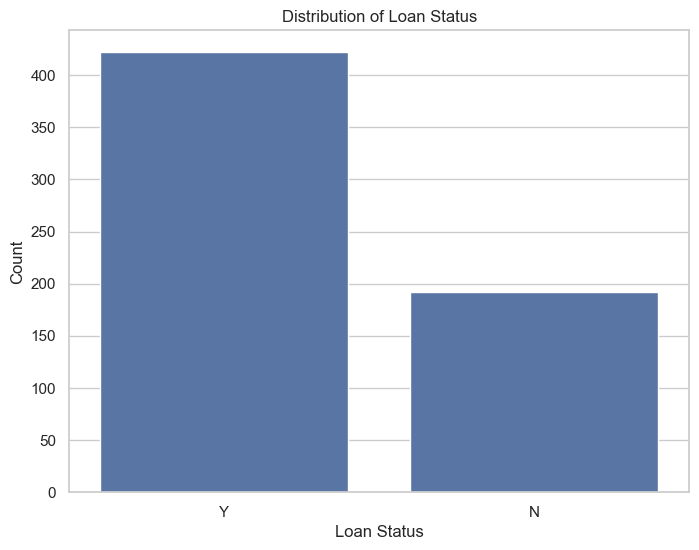

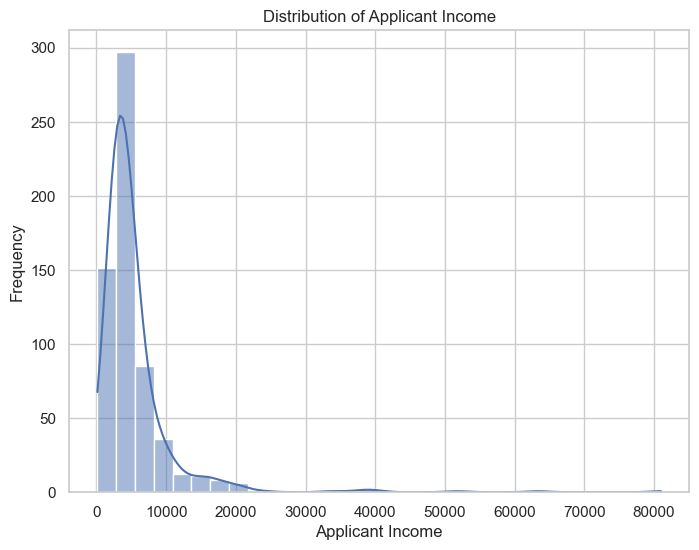

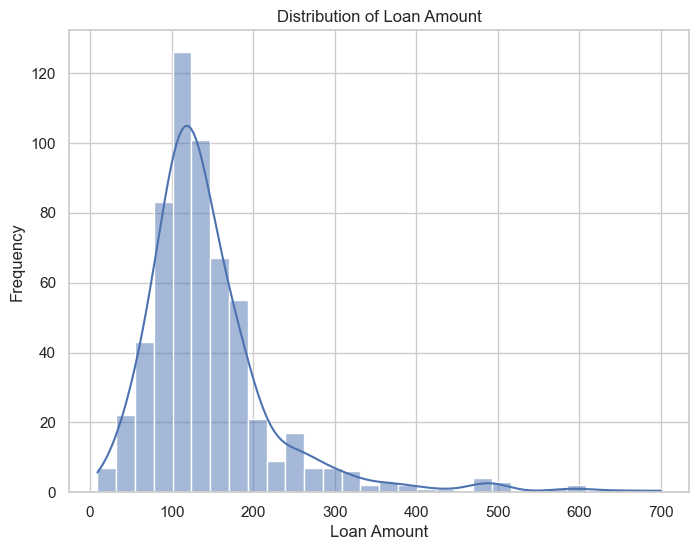

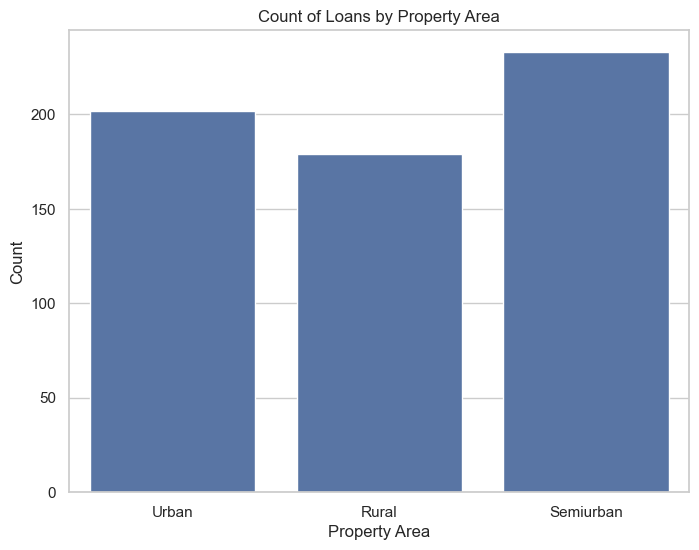

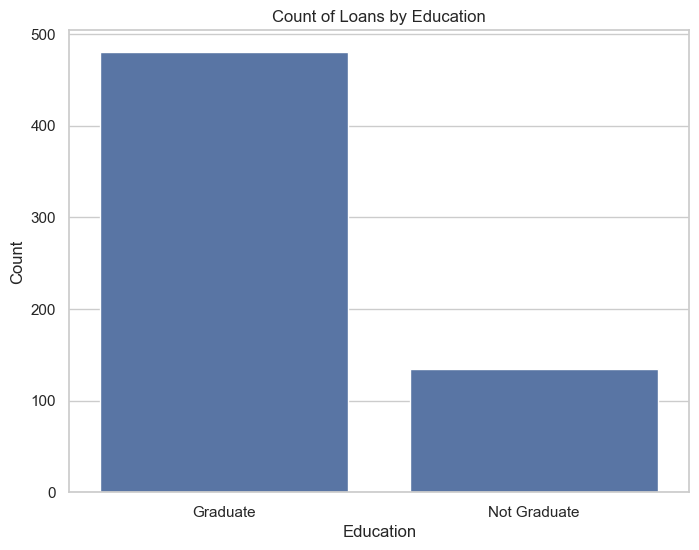

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style="whitegrid")

# 1. Distribution of Loan Status
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# 2. Distribution of Applicant Income
plt.figure(figsize=(8, 6))
sns.histplot(train_df['ApplicantIncome'], kde=True, bins=30)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

# 3. Distribution of Loan Amount
plt.figure(figsize=(8, 6))
sns.histplot(train_df['LoanAmount'], kde=True, bins=30)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# 4. Count of loans by Property Area
plt.figure(figsize=(8, 6))
sns.countplot(x='Property_Area', data=train_df)
plt.title('Count of Loans by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

# 5. Count of loans by Education
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=train_df)
plt.title('Count of Loans by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


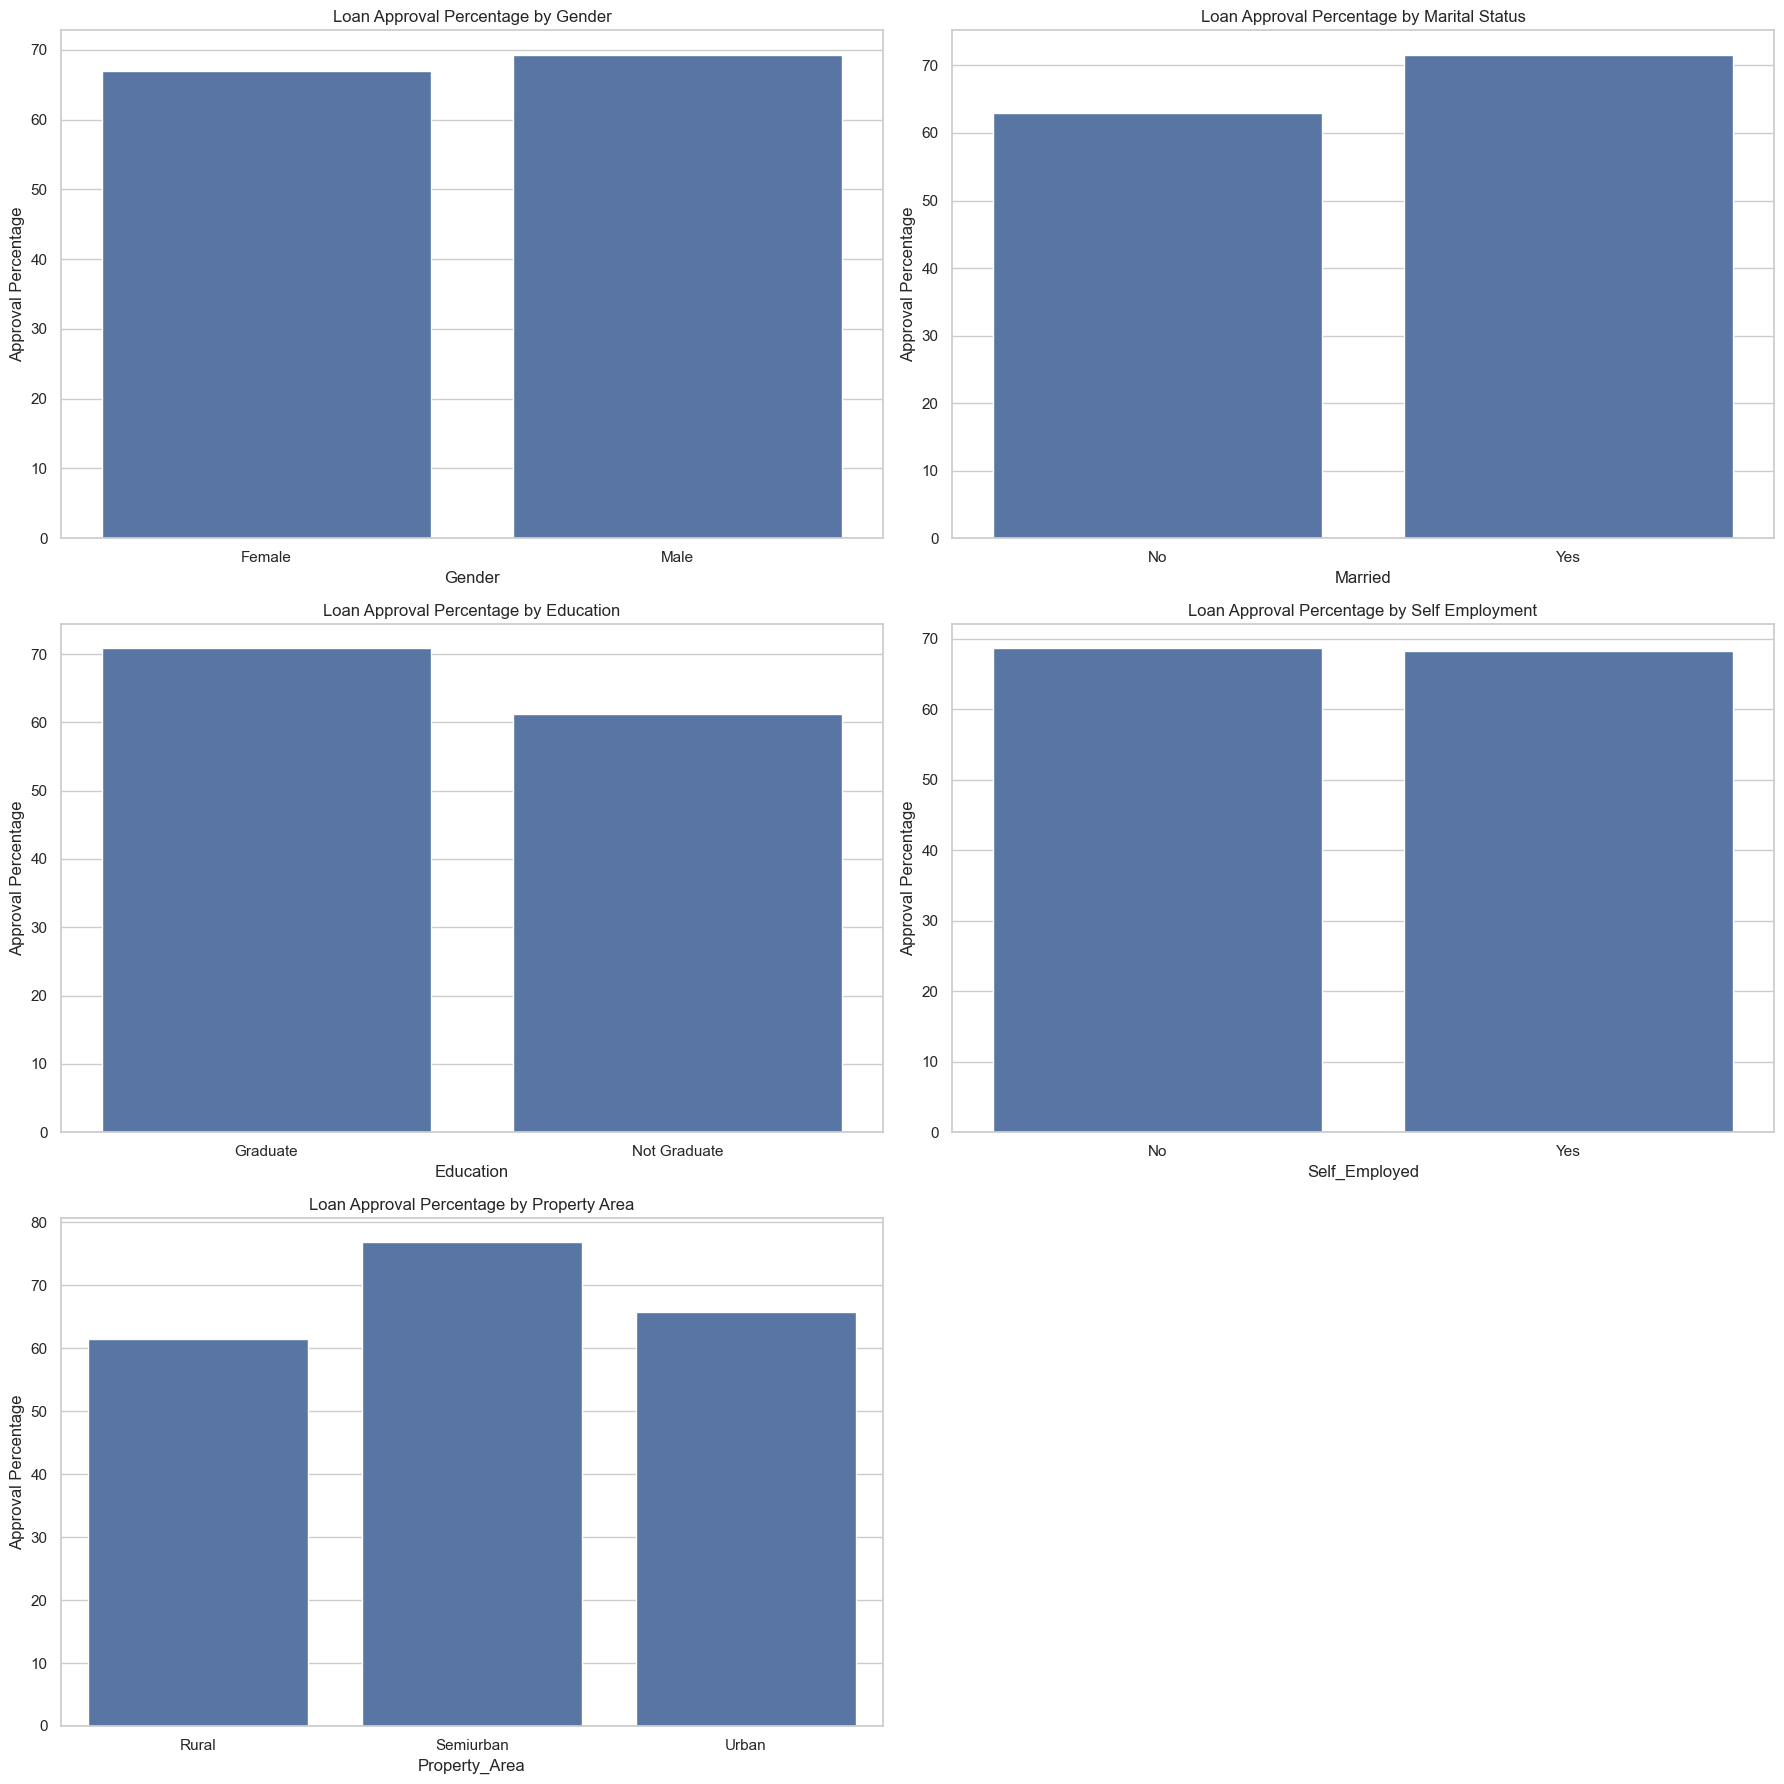

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style="whitegrid")

# Function to calculate approval percentages
def approval_percentage_by_factor(df, factor):
    approval_df = df.groupby(factor)['Loan_Status'].value_counts(normalize=True).unstack().fillna(0)
    approval_df['Approved'] = approval_df['Y'] * 100
    return approval_df['Approved']

# Calculate approval percentages for each factor
gender_approval = approval_percentage_by_factor(train_df, 'Gender')
married_approval = approval_percentage_by_factor(train_df, 'Married')
education_approval = approval_percentage_by_factor(train_df, 'Education')
self_employed_approval = approval_percentage_by_factor(train_df, 'Self_Employed')
property_area_approval = approval_percentage_by_factor(train_df, 'Property_Area')

# Plot the approval percentages
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

sns.barplot(x=gender_approval.index, y=gender_approval.values, ax=axes[0, 0])
axes[0, 0].set_title('Loan Approval Percentage by Gender')
axes[0, 0].set_ylabel('Approval Percentage')

sns.barplot(x=married_approval.index, y=married_approval.values, ax=axes[0, 1])
axes[0, 1].set_title('Loan Approval Percentage by Marital Status')
axes[0, 1].set_ylabel('Approval Percentage')

sns.barplot(x=education_approval.index, y=education_approval.values, ax=axes[1, 0])
axes[1, 0].set_title('Loan Approval Percentage by Education')
axes[1, 0].set_ylabel('Approval Percentage')

sns.barplot(x=self_employed_approval.index, y=self_employed_approval.values, ax=axes[1, 1])
axes[1, 1].set_title('Loan Approval Percentage by Self Employment')
axes[1, 1].set_ylabel('Approval Percentage')

sns.barplot(x=property_area_approval.index, y=property_area_approval.values, ax=axes[2, 0])
axes[2, 0].set_title('Loan Approval Percentage by Property Area')
axes[2, 0].set_ylabel('Approval Percentage')

# Hide the last subplot (empty)
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()
